# TimesSeries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
def df_to_X_y_multi(df, window_size=2):
  X, y = [], []
  df = df.to_numpy()
  for i in range(len(df) - window_size):
    seq_x, seq_y = df[i:i+window_size, :], df[i+window_size, :]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

def df_to_X_y(df, window_size=2):
  X, y = [], []
  # df = df.to_numpy()
  for i in range(len(df) - window_size):
    seq_x, seq_y = df[i:i+window_size], df[i+window_size]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
# Get data
url = 'https://raw.githubusercontent.com/dhamvi01/Univariate-Time-Series-using-LSTM/master/airline-passengers.csv'
data = pd.read_csv(url)

In [ ]:
# Jumlah data
data.count()

Month         144
Passengers    144
dtype: int64

In [ ]:
# Set index dates to data
data["Month"] = pd.to_datetime(data.Month, dayfirst=True)
data.set_index("Month", inplace=True)

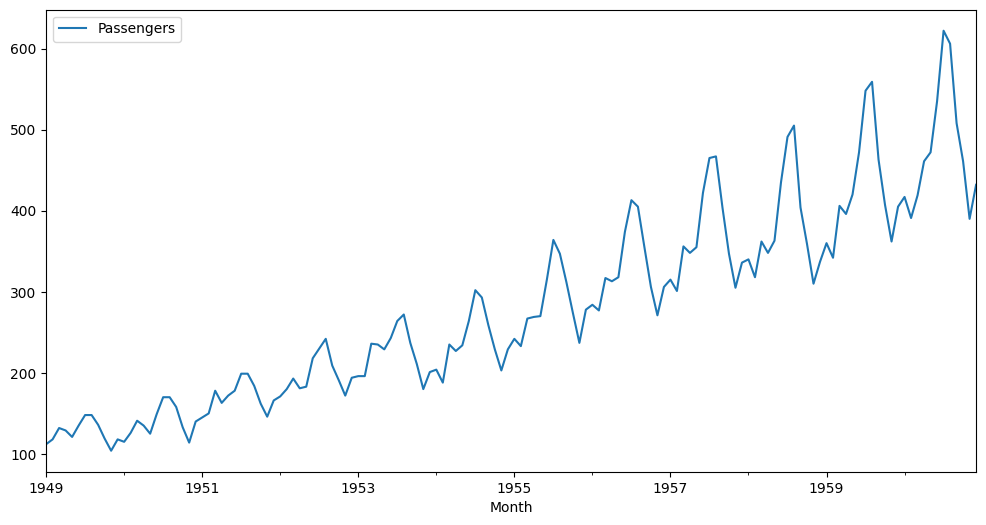

In [ ]:
# plot data
data.plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [ ]:
df = data.reset_index()['Passengers']

In [ ]:
# Skala Data
skala_data = (df.max()-df.min())*0.1
print('Skala Data : ', skala_data)

Skala Data :  51.800000000000004


## Timestamp

In [ ]:
window_size = 2
X, y = df_to_X_y(data['Passengers'], window_size)

In [ ]:
X.shape, y.shape

((142, 2), (142,))

In [ ]:
# column names to X and y data frames
df_X = pd.DataFrame(X, columns=['t-'+str(i) for i in range(window_size-1, -1,-1)])
df_y = pd.DataFrame(y, columns=['t+1 (prediction)'])

# concat df_X and df_y
df = pd.concat([df_X, df_y], axis=1)

## Normalisasi

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df

In [ ]:
X = df[:, :-1]
y = df[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

## Training

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

## Test

In [ ]:
y_pred=model_knn.predict(X_test)

## Evaluasi

$$ \text{MSE} = \frac{1}{n} \sum_{i=0}^n (y_i - \hat{y}_i)^2$$ 

### Tranformasi

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.02903039506021799